# Maven Mega Mart Analysis

### Import Libraries and Data

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In [43]:
# for editing font
class color:
    BOLD = '\033[1m'
    END = '\033[0m'

In [44]:
#import data
transactions = pd.read_csv("../course project datasets/project_transactions.csv")

df = transactions.copy()

products = pd.read_csv("../course project datasets/product.csv")

df2 = products.copy()

### Data Exploration

In [45]:
df.head() #check first five rows of data


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [46]:
df.tail() #check last five rows of data

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
2146306,1598,42305362535,711,92130,1,0.99,3228,0.00,102,0.0,0.0
2146307,1598,42305362535,711,114102,1,8.89,3228,0.00,102,0.0,0.0
2146308,1598,42305362535,711,133449,1,6.99,3228,0.00,102,0.0,0.0
2146309,1598,42305362535,711,6923644,1,4.50,3228,-0.49,102,0.0,0.0
2146310,1598,42305362535,711,14055192,1,6.99,3228,0.00,102,0.0,0.0


In [47]:
df.sample(5, random_state = 353) #check random sample of data with seed to reproduce data

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
864276,896,31883631393,329,13007284,1,1.50,396,-0.69,48,0.0,0.0
952940,32,32204280765,356,5566968,1,2.23,317,0.00,52,0.0,0.0
980054,596,32407796029,364,825135,1,17.99,297,0.00,53,0.0,0.0
1108209,1229,32957479382,403,847270,2,1.18,343,0.00,58,0.0,0.0
679036,955,31058357938,274,976300,6,2.67,367,-0.27,40,0.0,0.0


In [48]:
df.info(memory_usage="deep")  #check data types and memory useage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


### Observations:

There are seven (7) int64 data types and four (4) float64 data types.  Combined they use 180.1 MB of memory.  Some of the datatypes will be changed to lower the amount of memory used. Quantity and Store ID can be reduced to int32, Day to int16, and week number to int8.

In [49]:
#reduce memory useage by changing data types
df = df.astype(
    {'DAY': 'int16',
    'QUANTITY': 'int32',
    'STORE_ID': 'int32',
    'WEEK_NO': 'int8',
    })

In [50]:
df.info(memory_usage="deep") #check memory useage again to see how much space saved

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int16  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int32  
 5   SALES_VALUE        float64
 6   STORE_ID           int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int8   
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int16(1), int32(2), int64(3), int8(1)
memory usage: 137.1 MB


### Observations:  

memory useage was reduced from 180 mb to 137 mb.  

In [51]:
#statistical description of data

df.describe().round(3)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2146311.000,2.146311e+06,2146311.000,2.146311e+06,2146311.000,2146311.000,2146311.000,2146311.000,2146311.000,2146311.000,2146311.000
mean,1056.232,3.404897e+10,389.506,2.884715e+06,100.970,3.106,3267.939,-0.533,56.327,-0.016,-0.003
std,605.006,4.723748e+09,190.053,3.831949e+06,1152.364,4.186,9122.392,1.229,27.150,0.212,0.039
min,1.000,2.698490e+10,1.000,2.567100e+04,0.000,0.000,1.000,-130.020,1.000,-55.930,-7.700
25%,548.000,3.040798e+10,229.000,9.172310e+05,1.000,1.290,330.000,-0.680,33.000,0.000,0.000
50%,1042.000,3.281176e+10,392.000,1.027960e+06,1.000,2.000,372.000,0.000,57.000,0.000,0.000
75%,1581.000,4.012804e+10,555.000,1.132771e+06,1.000,3.490,422.000,0.000,80.000,0.000,0.000
max,2099.000,4.230536e+10,711.000,1.831630e+07,89638.000,840.000,34280.000,3.990,102.000,0.000,0.000


### Observations:

The max quantity of 89,638 is substantially higher than the mean quantity of 101.
The max sales value of 840 is substantially higher than the mean sales value of 3.


In [52]:
# Check the number of rows and columns in the data

print("There are", df.shape[0], 'rows and', df.shape[1], 'columns in the data set.')

There are 2146311 rows and 11 columns in the data set.


In [53]:
print('There are', df.isna().sum().sum(), 'null values in the data','\n',)
df.isna().sum() #check for missing values

There are 0 null values in the data 



household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

### Observations:

No missing data

In [54]:
#How many unique household keys, product ids and basket ids

uniq_hhk = df['household_key'].nunique()
uniq_prodID = df['PRODUCT_ID'].nunique()
uniq_bask = df['BASKET_ID'].nunique()

unique_cust_perc = (df['household_key'].nunique()/df['household_key'].value_counts().sum()*100).round(3)                                                                                                
                                                                                                     
print(f'There are {uniq_hhk} unique household keys, {uniq_prodID} unique product IDs, and {uniq_bask} unique basket IDs')

print(f'Only {unique_cust_perc} percent of customers are unique.')


There are 2099 unique household keys, 84138 unique product IDs, and 232939 unique basket IDs
Only 0.098 percent of customers are unique.


### Observations:

The number of household keys is much less than the number of basket ids.

Less than 10% of basket id's are from unique customers.  Most customers are repeat shoppers.
  

In [55]:
# Add and drop columns
df['TOTAL_DISC'] = df['RETAIL_DISC'] + df['COUPON_DISC'] #new column for total discount
df['PERC_DISC'] = (df['TOTAL_DISC'] / df['SALES_VALUE']).abs() #new column for percent discount

#modify percentage discount so that all discounts are between 0 and 1
df['PERC_DISC'] = (df['PERC_DISC']  
                            .where(df['PERC_DISC'] <1,1) # where < 1 is false, put 1
                            .where(df['PERC_DISC'] >0, 0)) # where >0 is false, put 0

#drop columns and overwrite existing dataframe
df = df.drop(['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'], axis=1)

df.head() #confirm all changes 

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,TOTAL_DISC,PERC_DISC
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000


### Statistics

In [56]:
#Total sales
total_sales = df['SALES_VALUE'].sum().round() #new variable, total_sales, stores value of sum of all SALES_VALUE

print(f' Total sales: ${total_sales:,}')

 Total sales: $6,666,243.0


In [57]:
#Sum of total discount column

sum_total_disc = df['TOTAL_DISC'].sum().round(4)

print(f'Total discount: {sum_total_disc:,}')

Total discount: -1,178,658.08


In [58]:
##Overall percentage discount equals sum of the new column, TOTAL_DISC divided by new variable, total_sales

overall_perc_disc = (df['TOTAL_DISC'].sum() / total_sales).round(4)

print(f' Overall percentage discount: {overall_perc_disc}')

 Overall percentage discount: -0.1768


In [59]:
#average percentage discount
avg_disc = round(df.PERC_DISC.mean(),4)

print(f'Average percentage discount: {avg_disc}')

Average percentage discount: 0.2073


In [60]:
#Total quantity sold 

total_quant_sold = df['QUANTITY'].sum()

print(f' Total quantity sold: {total_quant_sold:,}')

 Total quantity sold: 216,713,611


In [61]:
#Max quantity sold

max_quant_sold = df['QUANTITY'].max()

print(f' Max quantity sold: {max_quant_sold:,}')

 Max quantity sold: 89,638


In [62]:
# view row for max quantity sold

df.loc[df["QUANTITY"].argmax()].astype(str) #converted type to string to rid scientific notation

household_key            630.0
BASKET_ID        34749153595.0
DAY                      503.0
PRODUCT_ID           6534178.0
QUANTITY               89638.0
SALES_VALUE              250.0
STORE_ID                 384.0
WEEK_NO                   73.0
TOTAL_DISC              -13.45
PERC_DISC               0.0538
Name: 1442095, dtype: object

### Observations:

The discount percentage for the max quantity sold is small at .05. It is much less than the overall percentage discount.

In [63]:
# Average sales value per basket

sales_value_per_basket = (total_sales / df['BASKET_ID'].nunique()).round(2)

print(f' Average sales value per basket: {sales_value_per_basket}')

 Average sales value per basket: 28.62


In [64]:
# Average sales per household key

sales_value_per_household = (total_sales / df['household_key'].nunique()).round(2)

print(f' Average sales value per household key: {sales_value_per_household}')

 Average sales value per household key: 3175.91


 Max sales value: 840.0 
 Min sales value: 0.0 
 Average sales value: 3.11 
 Median_sales_value: 2.0 
 Standard Deviation: 4.19


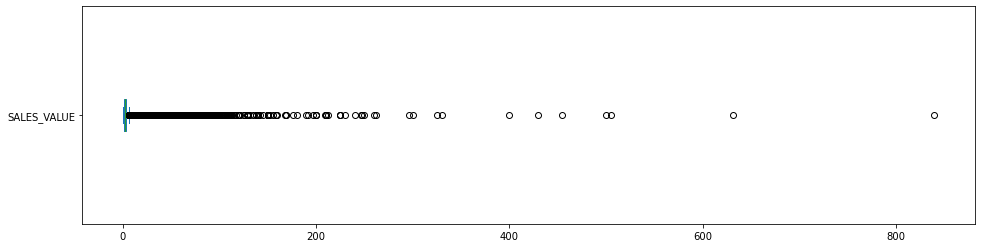

In [65]:
# Compare Sales Values of individual products: max, min, averages, outliers

df['SALES_VALUE'].T.plot.box(figsize=(16,4), vert = False);


max_sales_value = df['SALES_VALUE'].max()
min_sales_value = df['SALES_VALUE'].min()
    
avg_sales_value = round(df['SALES_VALUE'].mean(),2)
median_sales_value = df['SALES_VALUE'].median()
stdev = round(df['SALES_VALUE'].std(),2)

print('',"Max sales value:", max_sales_value,'\n',
    "Min sales value:", min_sales_value,'\n',
     "Average sales value:", avg_sales_value,'\n',
     "Median_sales_value:", median_sales_value,'\n',
     "Standard Deviation:", stdev)

### Observations:

There are a lot of outliers in the sales values, with a maximum of 840 dollars. Most sales values are very small with a median of 2 dollars but the large outliers are skewing the average and the standard deviation. Some of the outliers may need to be verified to make sure they are correct but for now the outliers will not be treated.  

In [66]:
#Number of individual stores

store_count = df['STORE_ID'].nunique()

print(f'There are {store_count} stores')

There are 526 stores


In [67]:
top_50_StoreSV = (df.
                groupby('STORE_ID')
                .agg({'SALES_VALUE': 'sum'})
                .sort_values('SALES_VALUE', ascending = False)
                .iloc[:50])

top_50_storeSV_sum = top_50_StoreSV.sum()

SV_top_perc = (top_50_StoreSV.sum()/total_sales).round(4)

print(color.BOLD+'Percent of total sales by top 50 stores:'+color.END, '\n',
     (SV_top_perc))


Percent of total sales by top 50 stores: 
 SALES_VALUE    0.6452
dtype: float64


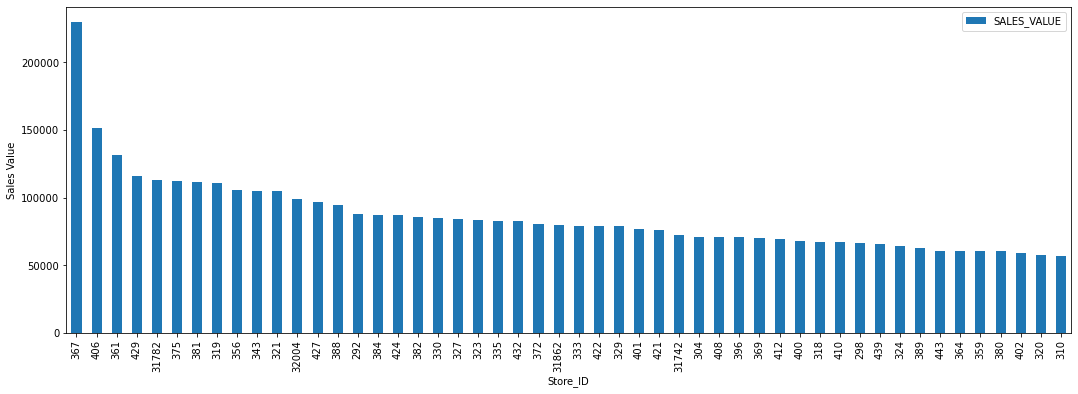

In [68]:
top_50_StoreSV.plot.bar(figsize=(18,6),xlabel= 'Store_ID', ylabel= 'Sales Value', rot=90);

### Observations:

Store 367 has a much higher sales value (approximately 250,000) than all the other stores.  This value will skew the average sales of the stores.  Store 367 should be evaluated further to understand why its sales are so high, and if that can be replicated at other stores.

In [69]:
bottom_100_StoreSV = (df.
                groupby('STORE_ID')
                .agg({'SALES_VALUE': 'sum'})
                .sort_values('SALES_VALUE', ascending = True)
                .iloc[:100])

bottom_100_StoreSV_sum = bottom_100_StoreSV.sum()

SV_bottom_perc = bottom_100_StoreSV.sum()/total_sales

print(color.BOLD+'Percent of total sales by bottom 100 stores:'+color.END, '\n', 
      (SV_bottom_perc))

bottom_100_StoreSV

Percent of total sales by bottom 100 stores: 
 SALES_VALUE    0.00011
dtype: float64


,SALES_VALUE
STORE_ID,
1235,0.00
610,0.50
256,0.76
639,0.85
551,1.00
...,...
195,15.33
2972,15.78
3035,15.99


### Observations:

Top 100 stores make up 95 percent of sales value.  The bottom 100 stores have very low or no sales.  It's possible these stores are not open for business yet or they could be closed locations. More information is needed.  Store sales value should be considered before acquiring because some of these stores may have cost associated with them but they are not producing revenue.

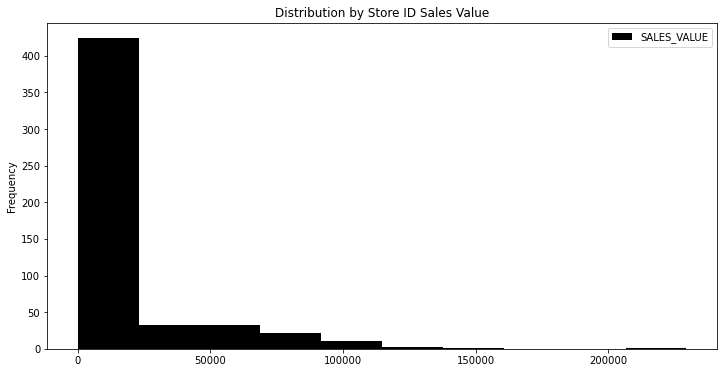

In [70]:
sales_distribution_by_store= (df
.groupby('STORE_ID')
.agg({'SALES_VALUE': 'sum'})
.plot.hist(figsize=(12,6),
           title = 'Distribution by Store ID Sales Value',
           color='Black'));


## Household Analysis



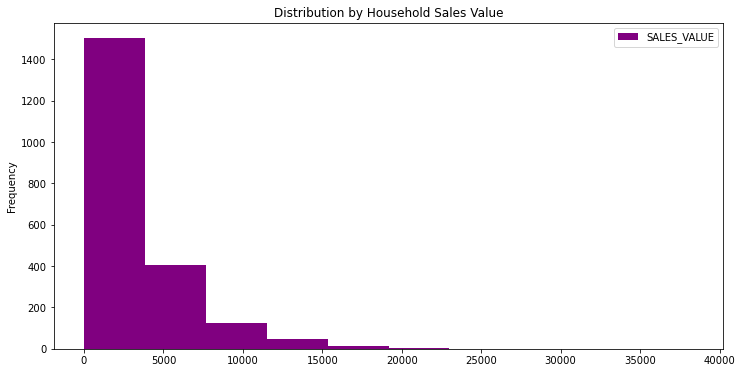

In [71]:
sales_dist = (df
.groupby('household_key')
.agg({'SALES_VALUE': 'sum'})
.plot.hist(figsize=(12,6),
           title = 'Distribution by Household Sales Value',
           color='Purple'));



### Observations:

The data for total household sales skewed left.  The majority of household sales value is about 4000 or less. Still, there is a is a significant number of households with sales values over 5000, with a small number over 15,000.


In [72]:
top_10_quantity = (df.
                groupby('household_key')
                .agg({'QUANTITY': 'sum'})
                .sort_values('QUANTITY', ascending = False)
                .iloc[:10])

top_10_quantity

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


### Observations:

Household ID 1023 purchased the highest quantity followed by Household ID 755.

In [73]:
top_10_values = (df.
                groupby('household_key')
                .agg({'SALES_VALUE': 'sum'})
                .sort_values('SALES_VALUE', ascending = False)
                .iloc[:10])

top_10_values

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


### Observations:

Household ID 1023 also had the highest sales value.  Household ID 755 that had second highest quantity value did not make the top 10 list for sales value. This demonstrates that the customer that purchases the most is not necessarily the most valuable customer, assuming that profit margins are consistent across products.

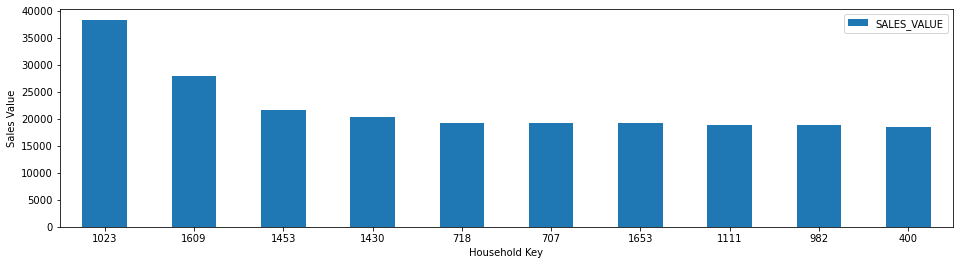

In [74]:
top_10_values.plot.bar(figsize=(16,4),xlabel= 'Household Key', ylabel= 'Sales Value', rot=0);



## Product Analysis



In [75]:
#Sales value of individual products

df_salesvalues_under_5 = df[df['SALES_VALUE']<5]
df_salesvalues_over_5 = df[df['SALES_VALUE']>=5]
df_salesvalues_over_30 = df[df['SALES_VALUE']>=30]

print('','The number of products with sales values under $5 is',' ',df_salesvalues_under_5.shape[0],'.','\n',
      'The number of products with sales values over or equalt to $5 is',' ',df_salesvalues_over_5.shape[0],'.','\n',
      'The number of products with sales values over or equal to $30 is',' ',df_salesvalues_over_30.shape[0],'.',sep='')





The number of products with sales values under $5 is 1868450.
The number of products with sales values over or equalt to $5 is 277861.
The number of products with sales values over or equal to $30 is 9731.


### Observations:

The majority of products sold for under 5 dollars.  There were 277,681 sales values over 5 but only 9731 of them were over $30.

#1 Product by sales value: 

   PRODUCT_ID  SALES_VALUE
0     6534178    420154.13 

#10 Product by sales value:
   PRODUCT_ID  SALES_VALUE
0     5569230     20051.95 

Average sales of top 10 products: 

SALES_VALUE    65508.652
dtype: float64 

Median sales of top 10 products: 

SALES_VALUE    23793.42
dtype: float64


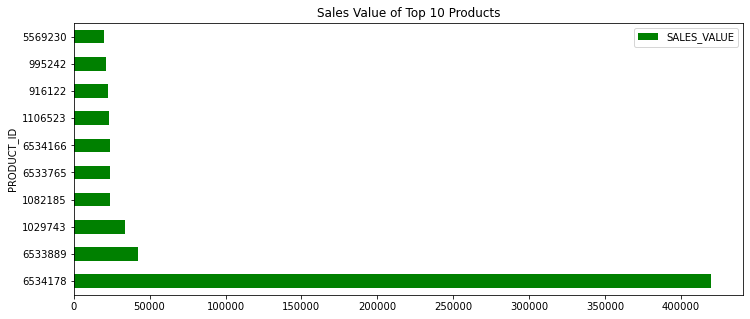

In [76]:
# Top 10 products by sales value
top_10_products = (df.
                groupby('PRODUCT_ID')  #group by product id
                .agg({'SALES_VALUE': 'sum'}) #sum of sales value for each product id
                .sort_values('SALES_VALUE', ascending = False) # sort from largest to smallest
                .iloc[:10]) #select the first 10 rows which will be largest since they are sorted

#variables for #1 product, #10 product, average and median of top 10 products
no_1_prod = top_10_products.iloc[0:1].reset_index()
no_10_prod = top_10_products.iloc[9:10].reset_index()
avg_sales_top_10_prod = top_10_products.mean()
median_sales_top_10_prod = top_10_products.median()

# print the sales value for #1 and #10 ranked product, and avg and median of the top 10 prod by sales value
print(color.BOLD+'#1 Product by sales value:'+color.END,'\n',)
print(f'{no_1_prod}','\n',)
print(color.BOLD+'#10 Product by sales value:'+color.END)
print(f'{no_10_prod}','\n',)
print(color.BOLD+'Average sales of top 10 products:'+color.END,'\n',)
print(avg_sales_top_10_prod,'\n',)
print(color.BOLD+'Median sales of top 10 products:'+color.END,'\n',)
print(median_sales_top_10_prod)



# plot the top products 
top_10_products.plot.barh(figsize =(12,5),  
                          title = 'Sales Value of Top 10 Products',
                          color = 'Green');



### Observations:

One product id #6534178 had substantially more sales value than any other product.  The sales value was over 400,000, while most others in the top 10 were under 25,000. 

The product with the highest value is right skewing the data causing the average to be 65,508 while the median is just 23,793.

In [77]:
Sent_open = 'The discount rate for the top 10 products is'
Sent_high = 'This is higher than the average discount of'
Sent_low = 'is lower than the average discount of'
Sent_end = 'for all products.'

In [78]:
#Discount rate of top 10 products
disc_rate_top_10 = (
    (df
    .query('PRODUCT_ID in @top_10_products.index')
    .loc[:, 'TOTAL_DISC']
    .sum())
    /(df
    .query('PRODUCT_ID in @top_10_products.index')
    .loc[:, 'SALES_VALUE']
    .sum())).round(4)


# Compare discount rate of top 10 products to the overall discount rate

if (disc_rate_top_10) > overall_perc_disc:
    print(f'{Sent_open} {disc_rate_top_10}.  {Sent_high} {overall_perc_disc} {Sent_end}')
else:
    print(f'{Sent_open} {disc_rate_top_10}.  {Sent_low} {overall_perc_disc} {Sent_end}')

The discount rate for the top 10 products is -0.1033.  This is higher than the average discount of -0.1768 for all products.


In [79]:
# Top 10 household products by product id
top_household_products = (df
                         .query("household_key in @top_10_values.index")
                         .loc[:,'PRODUCT_ID']
                         .value_counts()
                         .iloc[:10]
                         .index)

print('Product ID of Top 10 Household Products \n', *top_household_products, sep = '\n')

Product ID of Top 10 Household Products 

1082185
1029743
6534178
6533889
1127831
951590
860776
1106523
981760
9677202


In [80]:
#Query the value of the product id in top household products to find description of the product
products.query("PRODUCT_ID in @top_household_products")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


### Observations:

The products in the top 10 products appear to be mostly staple items like eggs, white bread, milk, paper towels, gasoline.  Staple are not likely to need a discount unless they are about to perish because they are often purchased without any incentive. 

In [81]:
#Query the product with the highest quantity in a single row
products.query("PRODUCT_ID == 6534178")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


### Observations:

The product with the highest sales value in a single row (ID 6534178) is gasoline which outsold all other products. 

In [82]:
products.query("PRODUCT_ID in @top_10_products.index")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


### Observations:

The products showing up most often in top 10 products and household products are gasoline and milk.  Households appear to value these stores for key staple items.

### Conclusions:

These stores have many repeat customers which may indicate that customers like this store or there are not convenient or affordable alternatives.  More information is needed about competitors.

These stores gain much of their revenue from staple items like milk, bread, and gasoline. This has value since staples often form a defensive product line during economic downturns.

Staple products sold at these stores are not as reliant on discounts as other products which are sold with higher discount rates.

Many of the top products at these stores are perishable items. Consistent turnover of these products is necessary to avoid losses.  This may at times require discounting but still appears to be less than the average discount.

The average price per product is under 5 dollars, so high volume is necessary to achieve high revenue.  Analysis on profit margin per product would provide additional insight.

The majority of sales revenue appears to come from a small number of stores. More information is needed about non-performing stores.

Gasoline is one of the top selling products at these stores.  This may work well now but performance projections more than 5 years out may need additional consideration of changing consumer preferences for electric vehicles.

The data only included information about store revenue.  To form a more complete picture of how the stores perform, cost would also need to be analyzed.

